In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load data
df = pd.read_csv("Loan_Prediction_Problem.csv")

In [3]:
# Add dummy Loan_Status column
df['Loan_Status'] = np.random.choice(['Y', 'N'], size=len(df))

In [4]:
# Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].median(),
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)


In [5]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [6]:
# Split features and target
X = df_encoded.drop('Loan_Status_Y', axis=1)
y = df_encoded['Loan_Status_Y']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Classification Accuracy: {accuracy:.2f}")
print(f"Classification Error Rate: {error_rate:.2f}")

Classification Accuracy: 0.53
Classification Error Rate: 0.47


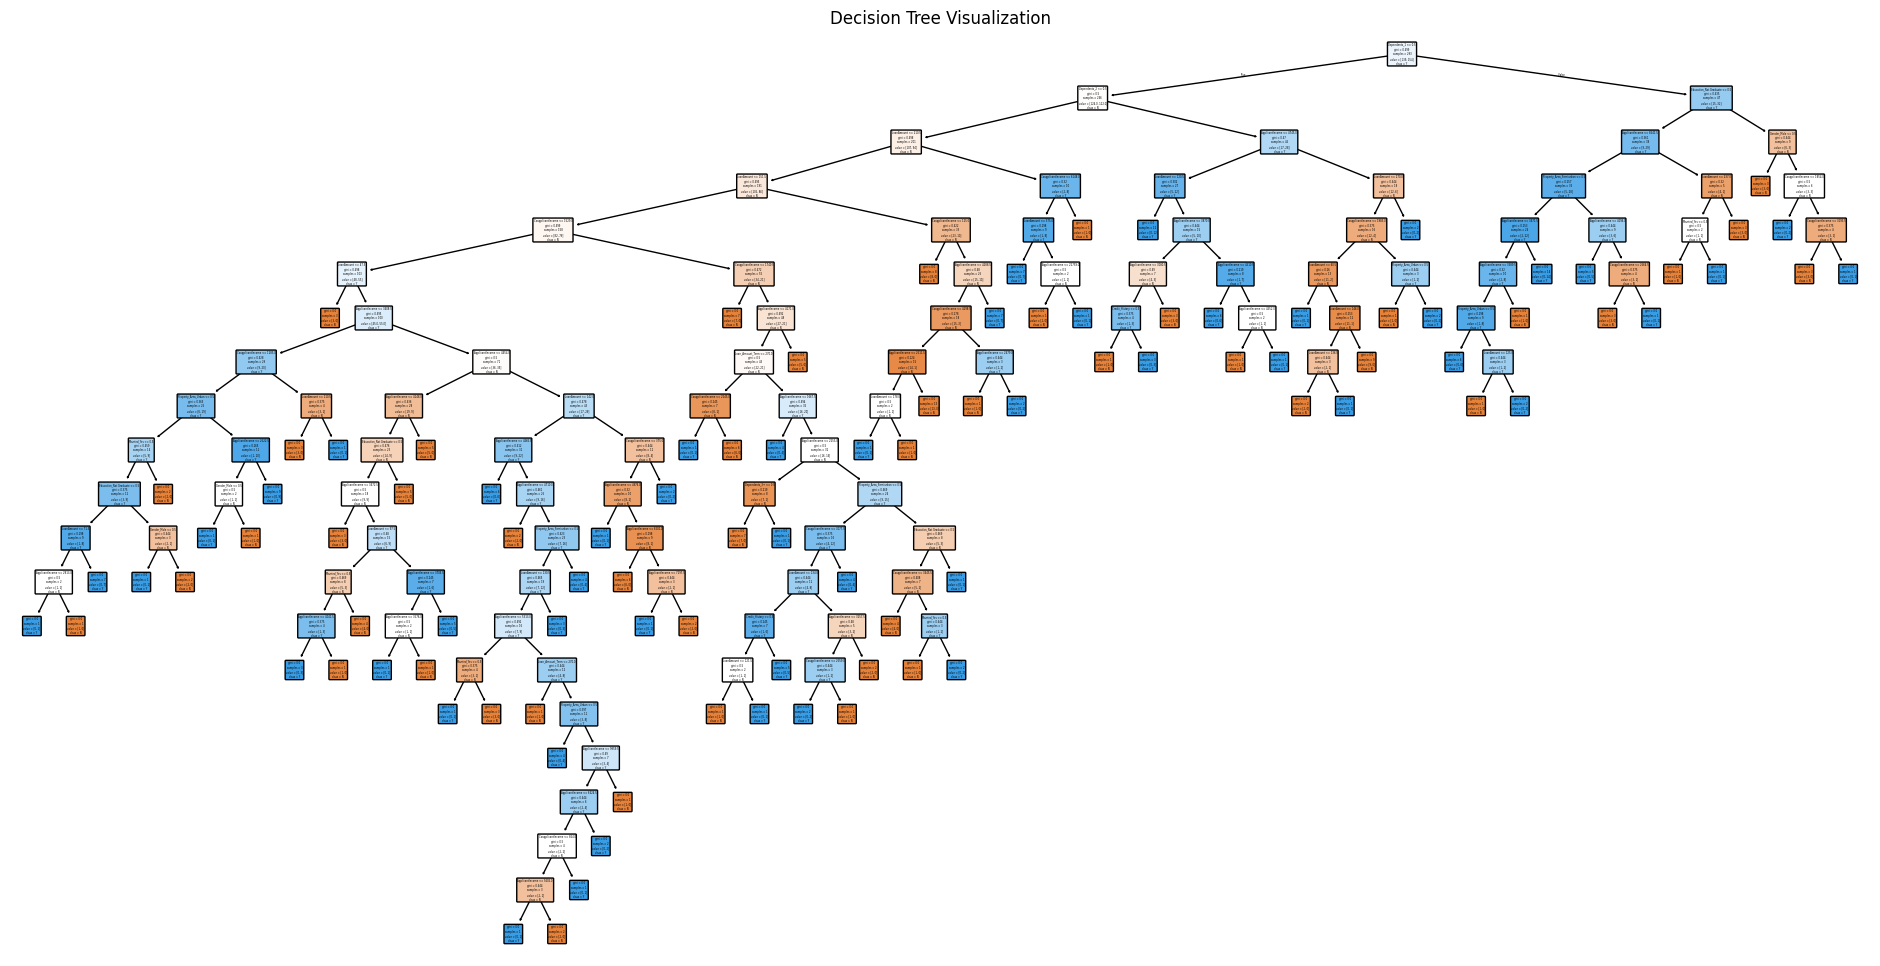

In [10]:
# Set figure size and plot the decision tree
plt.figure(figsize=(24, 12))
plot_tree(
    clf, 
    filled=True, 
    rounded=True, 
    feature_names=X.columns, 
    class_names=['N', 'Y']  # Based on dummy target
)
plt.title("Decision Tree Visualization")
plt.show()